In [1]:
import sqlalchemy
import pyodbc
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import requests
import io
import processing_functions
from site_information_class import SiteDataProcessor
%matplotlib inline



In [2]:
site_id = 15486 # Replace with your actual site ID
start_date_spill_query = '2019-01-01'
end_date_spill_query = '2024-10-31'

# Define the file path and name
file_path = f'../data/raw/site{site_id}_from_{start_date_spill_query}_to_{end_date_spill_query}_spill_block_date_ranges.xlsx'

# Import the file as a pandas dataframe
try:
    df_imported_date_ranges = pd.read_excel(file_path)
    print("Dataframe imported successfully:")
    print(df_imported_date_ranges.head())
except FileNotFoundError:
    print(f"File not found: {file_path}")

Dataframe imported successfully:
   Unnamed: 0  spill_event_id  start_date    end_date
0         160             161  2024-05-24  2024-05-27
1         161             162  2024-07-04  2024-07-06
2         162             163  2024-08-23  2024-08-25
3         163             164  2024-09-22  2024-09-24
4         164             165  2024-09-28  2024-09-06


In [5]:
import processing_functions
print(dir(processing_functions))

['DAL', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'count_exceedance_instances', 'datetime', 'df_daily_agg_sump_list', 'df_hour_agg_flow_meter_list', 'df_rainfall_list', 'df_raw_flow_meter_list', 'df_raw_sump_list', 'execute_query_and_return_df', 'execute_query_and_return_df_site_info', 'get_spill_block_periods', 'load_dataframes_from_raw', 'pd', 'plot_meanEValue', 'plot_rainfall_and_sump_level', 'plot_rainfall_mean_agg_flow_meter_and_raw_sump_level', 'plt', 'process_spill_hours', 'pyodbc', 're', 'read_queries', 'sqlalchemy', 'timedelta', 'update_plot']


In [7]:
'''
# Define the DataFrame with start and end times
time_periods = pd.DataFrame({
    'start_date': ['2024-09-20', '2024-03-10'],
    'end_date': ['2024-09-25', '2024-03-20']
})
'''
from processing_functions import load_dataframes_from_raw

time_periods = df_imported_date_ranges

# Initialize lists to store the dataframes for each type
df_raw_sump_list = []
df_raw_flow_meter_list = []
df_rainfall_list = []
df_hour_agg_flow_meter_list = []
df_daily_agg_sump_list = []

# Loop through each time period and load the dataframes
for index, row in time_periods.iterrows():
    start_date_str = row['start_date']
    end_date_str = row['end_date']
    df_raw_sump, df_raw_flow_meter, df_rainfall, df_hour_agg_flow_meter, df_daily_agg_sump = processing_functions.load_dataframes_from_raw(site_id, start_date_str, end_date_str)
    
    if df_raw_sump is not None:
        df_raw_sump_list.append(df_raw_sump)
    if df_raw_flow_meter is not None:
        df_raw_flow_meter_list.append(df_raw_flow_meter)
    if df_rainfall is not None:
        df_rainfall_list.append(df_rainfall)
    if df_hour_agg_flow_meter is not None:
        df_hour_agg_flow_meter_list.append(df_hour_agg_flow_meter)
    if df_daily_agg_sump is not None:
        df_daily_agg_sump_list.append(df_daily_agg_sump)

# Combine the dataframes for each type
df_raw_sump_combined = pd.concat(df_raw_sump_list, ignore_index=True)
df_raw_flow_meter_combined = pd.concat(df_raw_flow_meter_list, ignore_index=True)
df_rainfall_combined = pd.concat(df_rainfall_list, ignore_index=True)
df_hour_agg_flow_meter_combined = pd.concat(df_hour_agg_flow_meter_list, ignore_index=True)
#df_daily_agg_sump_combined = pd.concat(df_daily_agg_sump_list, ignore_index=True)

# Now you have combined dataframes for each type of data

df_raw_sump = df_raw_sump_combined
df_rainfall = df_rainfall_combined 
df_hour_agg_flow_meter = df_hour_agg_flow_meter_combined
df_raw_flow_meter = df_raw_flow_meter_combined


Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.


C:\Users\RMCGINT\AppData\Local\Temp\ipykernel_1552\1621479029.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_raw_sump_combined = pd.concat(df_raw_sump_list, ignore_index=True)
C:\Users\RMCGINT\AppData\Local\Temp\ipykernel_1552\1621479029.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_raw_flow_meter_combined = pd.concat(df_raw_flow_meter_list, ignore_index=True)
C:\Users\RMCGINT\AppData\Local\Temp\ipykernel_1552\1621479029.py:39: FutureWarning: The behavior of DataFrame concaten

In [9]:
# Print the head(5) of each dataframe and save to xlsx
if df_raw_sump is not None:
    print("Head of df_raw_sump:")
    print(df_raw_sump.head(5))



Head of df_raw_sump:
              TimeGMT       date SourceSystemId DbAddr        DbName  \
0 2024-05-24 01:00:00 2024-05-24              1  18527  Default Name   
1 2024-05-24 01:01:00 2024-05-24              1  18527  Default Name   
2 2024-05-24 01:02:00 2024-05-24              1  18527  Default Name   
3 2024-05-24 01:03:00 2024-05-24              1  18527  Default Name   
4 2024-05-24 01:04:00 2024-05-24              1  18527  Default Name   

       EValue  Year Month Day  
0  834.268127  2024     5  24  
1  837.840088  2024     5  24  
2  840.213867  2024     5  24  
3  844.780579  2024     5  24  
4  845.696167  2024     5  24  


In [11]:
if df_hour_agg_flow_meter is not None:
    print("Head of df_hour_agg_flow_meter:")
    print(df_hour_agg_flow_meter.head(5))

Head of df_hour_agg_flow_meter:
  Hour DbAddr count  meanEValue  stddev_EValue  Year Month Day
0    0  18529    60        0.61       1.456213  2024     5  24
1    1  18529    60        0.00       0.000102  2024     5  24
2    2  18529    60        0.00       0.000113  2024     5  24
3    3  18529    60        0.61       1.463655  2024     5  24
4    4  18529    60        0.00       0.000102  2024     5  24


In [13]:
df_raw_flow_meter.head()

,TimeGMT,date,SourceSystemId,DbAddr,DbName,EValue,Year,Month,Day
0,2024-05-24 01:00:00,2024-05-24,1,18529,Default Name,0.000000,2024,5,24
1,2024-05-24 01:01:00,2024-05-24,1,18529,Default Name,0.000049,2024,5,24
2,2024-05-24 01:02:00,2024-05-24,1,18529,Default Name,-0.000146,2024,5,24
3,2024-05-24 01:03:00,2024-05-24,1,18529,Default Name,0.000000,2024,5,24
4,2024-05-24 01:04:00,2024-05-24,1,18529,Default Name,-0.000244,2024,5,24


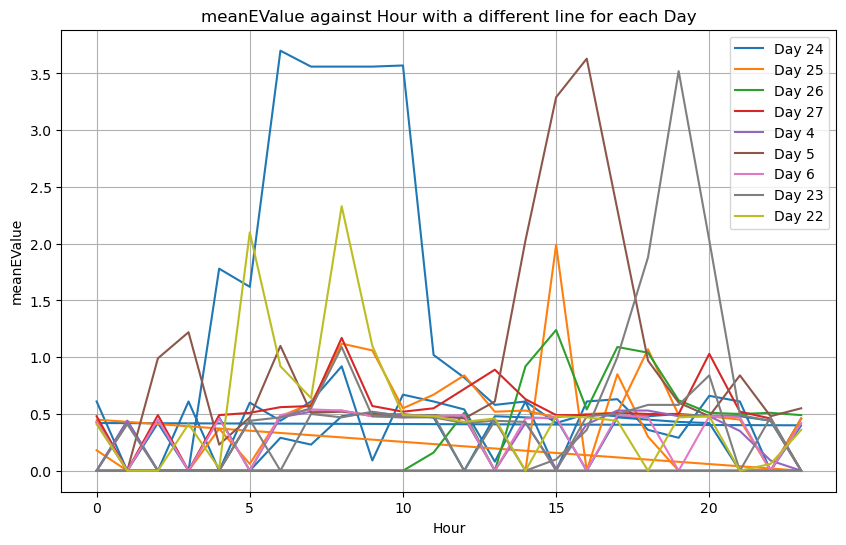

In [15]:

processing_functions.plot_meanEValue(df_hour_agg_flow_meter)

In [17]:
if df_raw_flow_meter is not None:
    print("Head of df_raw_flow_meter:")
    df_raw_flow_meter.rename(columns={'Evalue': 'flow_reading'}, inplace=True)
    print(df_raw_flow_meter.head(5))


Head of df_raw_flow_meter:
              TimeGMT       date SourceSystemId DbAddr        DbName  \
0 2024-05-24 01:00:00 2024-05-24              1  18529  Default Name   
1 2024-05-24 01:01:00 2024-05-24              1  18529  Default Name   
2 2024-05-24 01:02:00 2024-05-24              1  18529  Default Name   
3 2024-05-24 01:03:00 2024-05-24              1  18529  Default Name   
4 2024-05-24 01:04:00 2024-05-24              1  18529  Default Name   

     EValue  Year Month Day  
0  0.000000  2024     5  24  
1  0.000049  2024     5  24  
2 -0.000146  2024     5  24  
3  0.000000  2024     5  24  
4 -0.000244  2024     5  24  


In [19]:

import pandas as pd

if df_rainfall is not None:
    print("Head of df_rainfall:")
    print(df_rainfall.head(5))



Head of df_rainfall:
    ReadingDate Easting Northing  Intensity(mm/hr)  Depth(mm)  Year Month Day
0  202405251710  353500    86500              0.00       0.03  2024     5  25
1  202405251720  353500    86500              0.01       0.06  2024     5  25
2  202405261840  353500    86500              0.02       0.19  2024     5  26
3  202405261935  353500    86500              0.01       0.13  2024     5  26
4  202405262045  353500    86500              0.01       0.06  2024     5  26


In [21]:
# Convert the ReadingDate to datetime and localize to 'Europe/London'
df_rainfall['timestamp'] = pd.to_datetime(df_rainfall['ReadingDate'], format='%Y%m%d%H%M')
df_rainfall = df_rainfall.sort_values(by="timestamp")

# Localize the 'timestamp' column to 'Europe/London'
df_rainfall['timestamp'] = df_rainfall['timestamp'].dt.tz_localize('Europe/London')

# Convert the 'timestamp' column to UTC
df_rainfall['time_gmt'] = df_rainfall['timestamp'].dt.tz_convert('UTC')
df_rainfall['time_gmt_n'] = df_rainfall['time_gmt'].dt.tz_localize(None)

df_rainfall.head(5)



,ReadingDate,Easting,Northing,Intensity(mm/hr),Depth(mm),Year,Month,Day,timestamp,time_gmt,time_gmt_n
0,202405251710,353500,86500,0.00,0.03,2024,5,25,2024-05-25 17:10:00+01:00,2024-05-25 16:10:00+00:00,2024-05-25 16:10:00
1,202405251720,353500,86500,0.01,0.06,2024,5,25,2024-05-25 17:20:00+01:00,2024-05-25 16:20:00+00:00,2024-05-25 16:20:00
5,202405260810,353500,86500,0.01,0.16,2024,5,26,2024-05-26 08:10:00+01:00,2024-05-26 07:10:00+00:00,2024-05-26 07:10:00
11,202405260815,353500,86500,0.02,0.19,2024,5,26,2024-05-26 08:15:00+01:00,2024-05-26 07:15:00+00:00,2024-05-26 07:15:00
6,202405260820,353500,86500,0.00,0.03,2024,5,26,2024-05-26 08:20:00+01:00,2024-05-26 07:20:00+00:00,2024-05-26 07:20:00


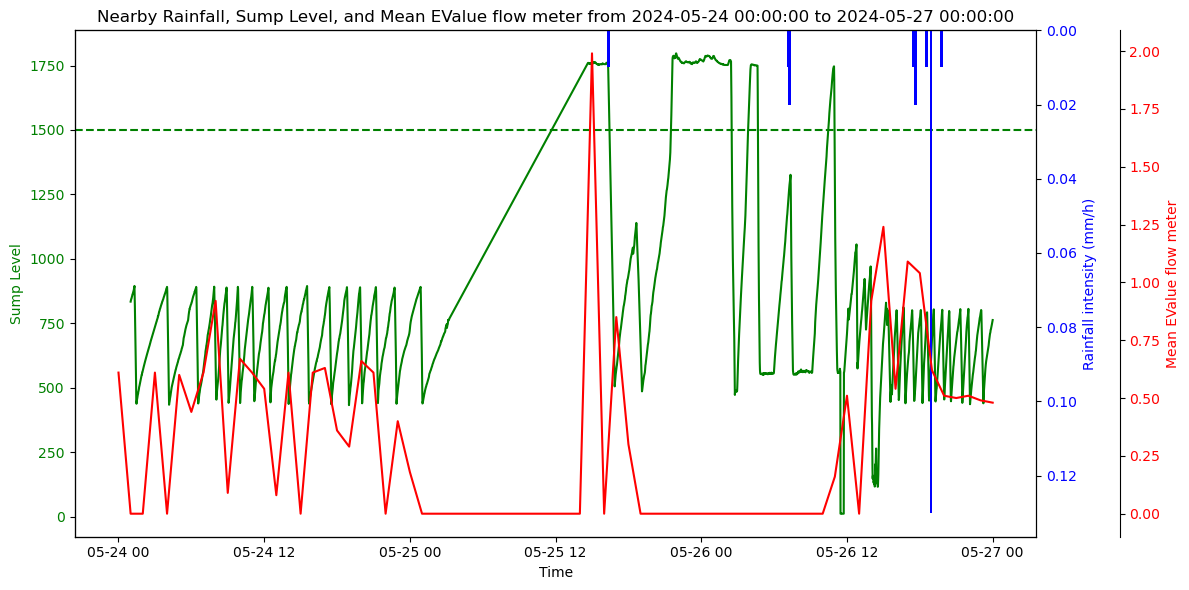

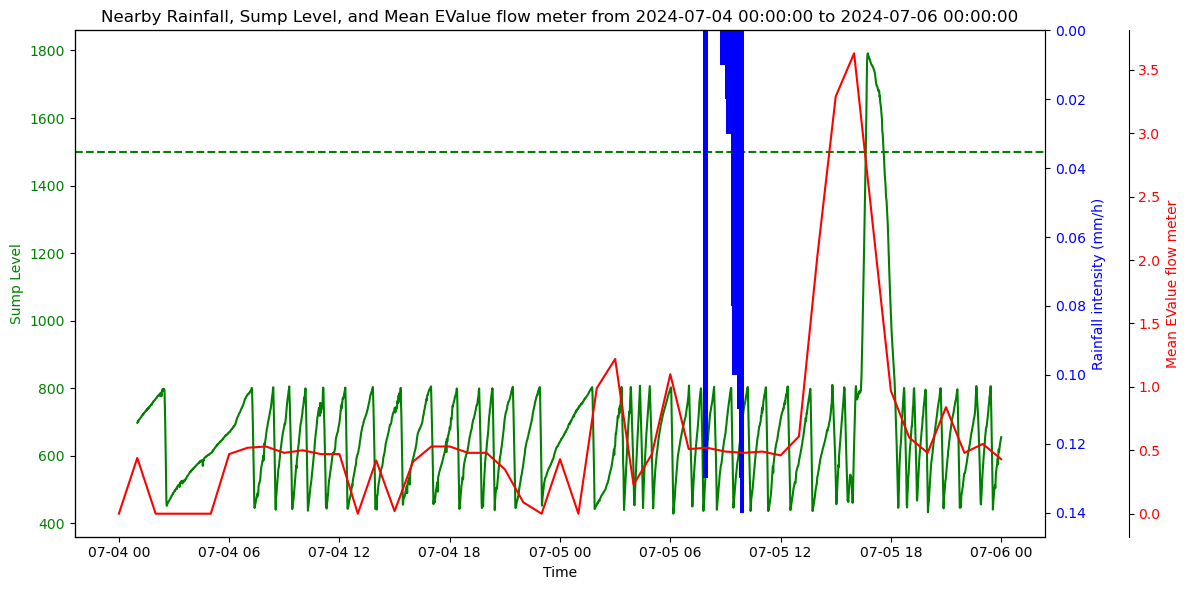

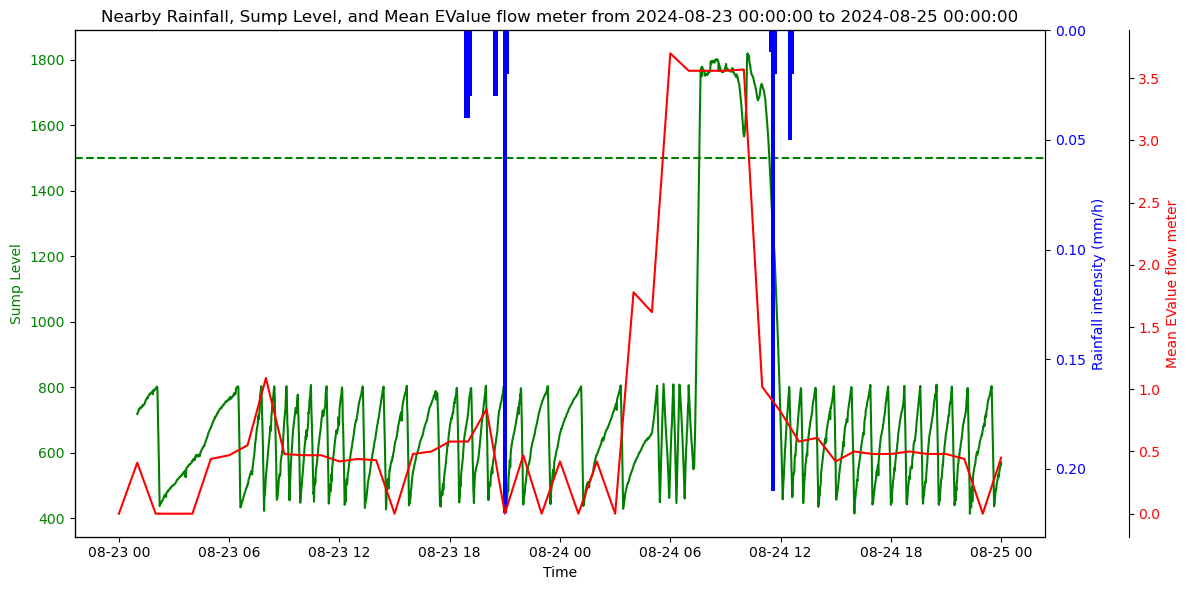

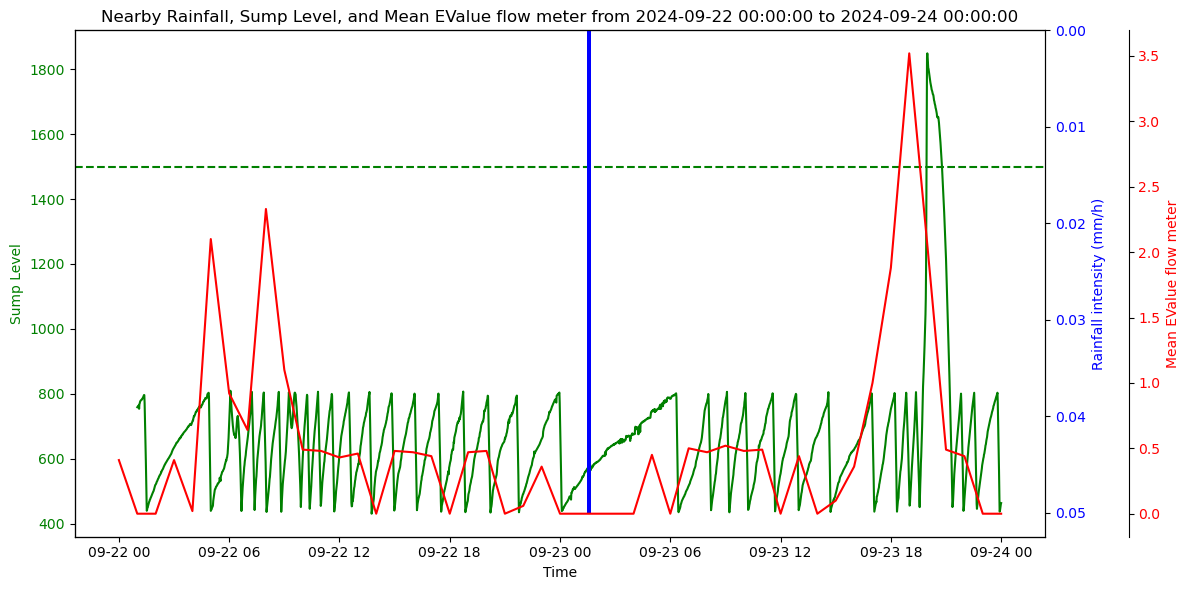

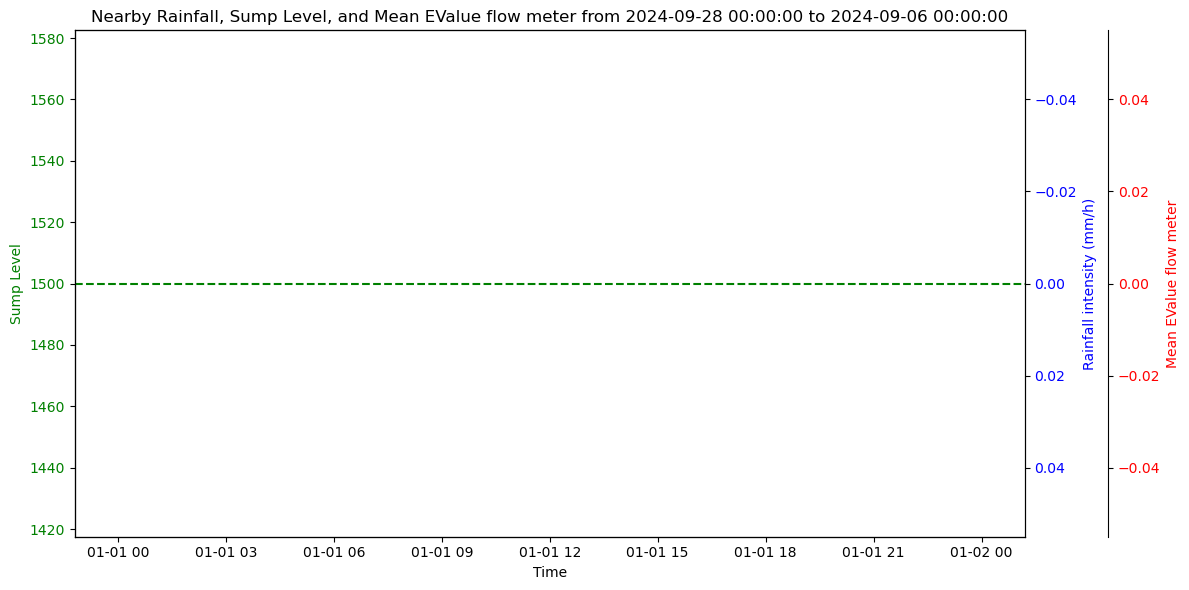

In [23]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import processing_functions
from processing_functions import plot_rainfall_mean_agg_flow_meter_and_raw_sump_level

df_sump_filtered = df_raw_sump
df_rainfall_filtered = df_rainfall
df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter


spill_level = 1500

# Example usage
#processing_functions.plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_time_plot, end_time_plot, df_sump_filtered, df_rainfall_filtered, df_hour_agg_flow_meter_filtered)
for index, row in time_periods.iterrows():
    start_date_plot = row['start_date']
    end_date_plot = row['end_date']
    processing_functions.plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_date_plot, end_date_plot, df_sump_filtered, df_rainfall, df_hour_agg_flow_meter, spill_level=spill_level)



In [ ]:
df_sump_filtered.head(5)

In [ ]:
import pandas as pd

def identify_falling_periods(df, start_date, end_date):
    """Identifies periods where EValue is falling.

    Args:
        df (pd.DataFrame): Input DataFrame.
        start_date (str): Start date for filtering.
        end_date (str): End date for filtering.

    Returns:
        pd.DataFrame: DataFrame with falling periods.
    """
    # Check if required columns exist
    required_columns = ['TimeGMT', 'EValue']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Missing required columns: {required_columns}")

    # Convert 'TimeGMT' to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['TimeGMT']):
        df['TimeGMT'] = pd.to_datetime(df['TimeGMT'])

    # Filter the DataFrame by the date range
    df = df[(df['TimeGMT'] >= start_date) & (df['TimeGMT'] <= end_date)]

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df[['TimeGMT', 'EValue']].copy()

    # Add a new boolean column 'Falling'
    df_copy['Falling'] = df_copy['EValue'].le(df_copy['EValue'].shift())

    return df_copy




In [ ]:
# Define your thresholds
your_spill_threshold = 90  # Example value, replace with actual spill level
your_on_level_threshold = 45
your_on_level_upper_limit = 47
your_sump_level_lower_limit = 85

# Define your date range
start_date_str = '2022-06-01'
end_date_str = '2022-08-20'

# Convert date strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Example DataFrame
# df = pd.read_csv('your_data.csv')

# Identify falling periods
falling_df = identify_falling_periods(df_sump_filtered, start_date, end_date)

#falling_df.describe()
falling_df.describe()

In [ ]:
def filter_falling_periods(df, spill_threshold, on_level_threshold, on_level_upper_limit, sump_level_lower_limit):
    """Filters falling periods based on specified conditions.

    Args:
        df (pd.DataFrame): DataFrame with falling periods.
        spill_threshold (float): Threshold for spill level.
        on_level_threshold (float): Threshold for on-level level.
        on_level_upper_limit (float): Upper limit for on-level level.
        sump_level_lower_limit (float): Lower limit for sump level.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    falling_periods = []
    current_period = []
    non_falling_count = 0

    for index, row in df.iterrows():
        if row['Falling'] and spill_threshold >= row['EValue'] >= on_level_threshold:
            current_period.append(row)
            non_falling_count = 0  # Reset the non-falling count
        else:
            if non_falling_count < 20:
                current_period.append(row)
                non_falling_count += 1
            else:
                if current_period:  # End of falling period
                    falling_periods.append(current_period)
                    current_period = []
                    non_falling_count = 0

    # Add the last period if it was falling
    if current_period:
        falling_periods.append(current_period)

    # Convert list of periods into separate dataframes
    falling_dfs = [pd.DataFrame(period) for period in falling_periods if period]

    filtered_falling_dfs = []
    for df in falling_dfs:
        try:
            if df['EValue'].iloc[0] >= sump_level_lower_limit and df['EValue'].iloc[-1] <= on_level_upper_limit:
                filtered_falling_dfs.append(df)
        except (KeyError, TypeError):
            print("Error processing DataFrame:", df)

    for i, df in enumerate(filtered_falling_dfs):
        df['falling_period_id'] = i

    # Combine all individual dataframes back into one dataframe if needed
    if filtered_falling_dfs:
        final_df_falling_periods = pd.concat(filtered_falling_dfs).reset_index(drop=True)
    else:
        final_df_falling_periods = pd.DataFrame()  # Return an empty DataFrame if no periods found

    return final_df_falling_periods

In [ ]:
# Filter falling periods
result_is_falling = filter_falling_periods(falling_df, 
                                           spill_threshold=your_spill_threshold,
                                           on_level_threshold=your_on_level_threshold,
                                           on_level_upper_limit=your_on_level_upper_limit,
                                           sump_level_lower_limit=your_sump_level_lower_limit)

print("Resulting Falling Periods DataFrame:")
result_is_falling.describe()



In [ ]:
# Save the result to a xlsx file in .../data/processed
output_path = '../data/processed/{site_id}_{start_time_screen}_{end_time_screen}_result_is_falling.xlsx'
result_is_falling.to_excel(output_path, index=False)
print(f"DataFrame saved to {output_path}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

final_df_falling_periods = result_is_falling
# Assuming final_df_falling_periods is your dataframe from the previous steps
# Reset the TimeGMT to 0 for each falling_period_id
final_df_falling_periods['TimeGMT_reset'] = final_df_falling_periods.groupby('falling_period_id')['TimeGMT'].transform(lambda x: x - x.min())
final_df_falling_periods['TimeGMT_reset_seconds'] = final_df_falling_periods['TimeGMT_reset'].dt.total_seconds()

# Plotting
plt.figure(figsize=(10, 6))

for period_id, group in final_df_falling_periods.groupby('falling_period_id'):
    plt.plot(group['TimeGMT_reset_seconds'], group['EValue'], label=f'Period {period_id}')

plt.xlabel('TimeGMT_reset_seconds')
plt.ylabel('EValue')
plt.title('Falling Periods Overlay - Spill level to ON level')
plt.legend()
plt.show()


In [ ]:

df_raw_flow_meter.rename(columns={'EValue': 'flow_reading'}, inplace=True)


In [ ]:
df_raw_flow_meter.describe()

In [ ]:

def calculate_median(row, df_flow_meter):
    current_time = row['TimeGMT']
    previous_time = final_df_falling_periods.iloc[row.name - 1]['TimeGMT'] if row.name > 0 else current_time
    mask = (df_flow_meter['TimeGMT'] >= previous_time) & (df_flow_meter['TimeGMT'] <= current_time)
    median_value = df_flow_meter.loc[mask, 'flow_reading'].median()
    return median_value

# Apply the function to each row
final_df_falling_periods['median_value'] = final_df_falling_periods.apply(calculate_median, axis=1, df_flow_meter=df_raw_flow_meter)

final_df_falling_periods.head(5)


In [ ]:
def calculate_pumped_out_volume(row):
    if row.name == 0 or final_df_falling_periods.iloc[row.name]['falling_period_id'] != final_df_falling_periods.iloc[row.name - 1]['falling_period_id']:
        return 0
    else:
        seconds_increment = (final_df_falling_periods.iloc[row.name]['TimeGMT_reset_seconds'] - final_df_falling_periods.iloc[row.name - 1]['TimeGMT_reset_seconds'])
        return row['median_value'] * seconds_increment/ 1000   # Convert to cubic meters

# Apply the function to each row
final_df_falling_periods['pumped_out_volume (m^3)'] = final_df_falling_periods.apply(calculate_pumped_out_volume, axis=1)

final_df_falling_periods.describe()

In [ ]:
final_df_falling_periods.head(20)



In [ ]:
final_df_falling_periods['cumulative_vol_pumped_out (m^3)'] = final_df_falling_periods.groupby('falling_period_id')['pumped_out_volume'].cumsum()

# Plotting the graph
plt.figure(figsize=(10,6))

# Loop through each unique falling_period_id and plot the corresponding data
for period_id in final_df_falling_periods['falling_period_id'].unique():
    period_data = final_df_falling_periods[final_df_falling_periods['falling_period_id'] == period_id]
    plt.plot(period_data['TimeGMT_reset_seconds'], period_data['cumulative_vol_pumped_out (m^3)'], label=f'Period {period_id}')

# Adding labels and title
plt.xlabel('Time Reset Seconds')
plt.ylabel('Cumulative Volume Pumped Out (m^3)')
plt.title('Cumulative Volume Pumped Out vs Time Reset Seconds')
plt.legend()

# Show the plot
plt.show()
